Importing numpy, pandas and matplotlib

In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
%pylab inline
pylab.rcParams['figure.figsize'] = (12,12)

Populating the interactive namespace from numpy and matplotlib


/anaconda/lib/python3.6/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


Loadings the files:
1. quant_scores = stock quant scores
2. total_returns = stock total returns
3. index_wts = stock index weights over time
4. index_return = return of the index

In [2]:
dfqs = pd.read_csv('//Users//Jamie//Documents//Jupyter Notebook Files//quant_scores.csv', index_col = 0, parse_dates=True)
dftr = pd.read_csv('//Users//Jamie//Documents//Jupyter Notebook Files//total_returns.csv', index_col = 0, parse_dates=True)
dfindwt = pd.read_csv('//Users//Jamie//Documents//Jupyter Notebook Files//index_wts.csv', index_col = 0, parse_dates=True)
dfpsei = pd.read_csv('//Users//Jamie//Documents//Jupyter Notebook Files//pcomp_return.csv', index_col = 0, parse_dates=True)

Checking the relationship of scores to forward performance of the stock.

I am going to do this by checking the regression line of performance versus the score.

In [49]:
def convert_to_pricelevel(dfinput):
    dfpl = dfinput
    x, y = dfpl.shape
    for a in range(0,x):
        for b in range(0,y):
            if (a==0) & (type(dfpl.loc[dfpl.index[a], dfpl.columns[b]])==np.float64) & (not(np.isnan(dfpl.loc[dfpl.index[a], dfpl.columns[b]]))):
                dfpl.loc[dfpl.index[a], dfpl.columns[b]] = 1.00
            elif ((a+1)<x) & (np.isnan(dfpl.loc[dfpl.index[a], dfpl.columns[b]])) & (type(dfpl.loc[dfpl.index[np.minimum(a+1,x-1)], dfpl.columns[b]])==np.float64) & (not(np.isnan(dfpl.loc[dfpl.index[np.minimum(a+1,x-1)], dfpl.columns[b]]))):
                dfpl.loc[dfpl.index[a], dfpl.columns[b]] = 1.00
            elif np.isnan(dfpl.loc[dfpl.index[a], dfpl.columns[b]]):
                dfpl.loc[dfpl.index[a], dfpl.columns[b]] = np.nan
            elif (type(dfpl.loc[dfpl.index[a], dfpl.columns[b]])==np.float64) & (a>=1):
                dfpl.loc[dfpl.index[a], dfpl.columns[b]] = dfpl.loc[dfpl.index[a-1], dfpl.columns[b]]*(1+(dfpl.loc[dfpl.index[a], dfpl.columns[b]]))
    return dfpl

In [51]:
#transforming the dftr into price levels

dfstockpl = convert_to_pricelevel(dftr/100)
dfstockpl.head(5)

,BCI,ION,ICT,URC,UBP,SMCB,ABS,FLI,RLC,EEI,...,RCB,VLL,GMA7,PSE,CHIB,CEB,SMDC,BLOOM,LTG,EMP
36922,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,NaN,NaN,NaN,1.000000,NaN,1.000000,NaN,1.0000,NaN
36950,1.061224,0.838710,0.876712,0.916667,0.812500,0.940000,0.989583,1.018519,1.028571,0.912281,...,1.055556,NaN,NaN,NaN,0.906667,NaN,1.011111,NaN,1.1200,NaN
36981,1.061224,0.741935,0.712329,0.750000,0.781250,0.803419,0.875000,0.711112,0.952381,0.631579,...,0.925926,NaN,NaN,NaN,0.826667,NaN,0.888889,NaN,1.2544,NaN
37011,1.040816,0.758064,0.780822,0.750000,0.828125,0.779316,0.762501,0.696297,0.881834,0.666667,...,0.812216,NaN,NaN,NaN,0.800001,NaN,0.944444,NaN,1.2544,NaN
37042,1.020407,0.741935,1.520547,0.750000,0.786250,0.825915,0.804862,0.770371,0.881834,0.701756,...,0.828460,NaN,NaN,NaN,0.906667,NaN,0.933333,NaN,1.4560,NaN


In [54]:
#transforming the psei into price levels

dfpseipl =  convert_to_pricelevel(dfpsei)
dfpseipl.head(5)

,PCOMP TR,PCOMP Price
36922,1.000000,1.000000
36950,0.956997,0.956426
36980,0.859226,0.857380
37011,0.819519,0.817333
37042,0.835018,0.831233


Creating the x month return dataframe function

In [23]:
def x_monthforwardreturn(x, dfinput):
    dfinput_x = dfinput.shift(int(x))
    dfret_x = dfinput_x/dfinput - 1
    return dfret_x

Applying function to the dataframe (3 month forward return below)

In [70]:
dfstockplret_3m = x_monthforwardreturn(3, dfstockpl)
print (dfstockplret_3m.shape)
dfstockplret_3m.head(5)

(192, 76)


,BCI,ION,ICT,URC,UBP,SMCB,ABS,FLI,RLC,EEI,...,RCB,VLL,GMA7,PSE,CHIB,CEB,SMDC,BLOOM,LTG,EMP
36922,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36981,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37011,-0.039215,0.319149,0.280702,0.333333,0.207548,0.283176,0.311475,0.436169,0.1340,0.499998,...,0.231199,NaN,NaN,NaN,2.499991e-01,NaN,0.058824,NaN,-0.202806,NaN
37042,0.040000,0.130436,-0.423423,0.222222,0.033387,0.138132,0.229506,0.322115,0.1664,0.299998,...,0.274118,NaN,NaN,NaN,-9.512956e-08,NaN,0.083334,NaN,-0.230769,NaN


In [58]:
dfpseiTRpl = pd.DataFrame(dfpseipl['PCOMP TR'])
dfpseiTRpl.head(5)

,PCOMP TR
36922,1.000000
36950,0.956997
36980,0.859226
37011,0.819519
37042,0.835018


In [69]:
dfpseiTR_3m = x_monthforwardreturn(3, dfpseiTRpl)
print (dfpseiTR_3m.shape)
dfpseiTR_3m.head(5)

(192, 1)


,PCOMP TR
36922,NaN
36950,NaN
36980,NaN
37011,0.220228
37042,0.146080


Subtracting the columns to the price return of PCOMP

In [93]:
#rounding to 6 digits
dfstockplret_3m = round(dfstockplret_3m,6)
dfpseiTR_3m = round(dfpseiTR_3m,6)

#converting dfpseiTR_3m into a series so that I can subtract it from the dataframe of stock 3m forward returns
tempSeries = [x for x in dfpseiTR_3m['PCOMP TR']]
tempSeries

dfoutperf_3m = dfstockplret_3m.sub(tempSeries, axis=0)
print (dfoutperf_3m.shape)
dfoutperf_3m.head(5)

(192, 76)


,BCI,ION,ICT,URC,UBP,SMCB,ABS,FLI,RLC,EEI,...,RCB,VLL,GMA7,PSE,CHIB,CEB,SMDC,BLOOM,LTG,EMP
36922,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36981,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37011,-0.259443,0.098921,0.060474,0.113105,-0.012680,0.062948,0.091246,0.215941,-0.086228,0.279770,...,0.010971,NaN,NaN,NaN,0.029771,NaN,-0.161404,NaN,-0.423034,NaN
37042,-0.106080,-0.015644,-0.569503,0.076142,-0.112693,-0.007948,0.083426,0.176035,0.020320,0.153918,...,0.128038,NaN,NaN,NaN,-0.146080,NaN,-0.062746,NaN,-0.376849,NaN


In [142]:
dfqs.head(5)

,BCI,ION,ICT,URC,UBP,SMCB,ABS,FLI,RLC,EEI,...,RCB,VLL,GMA7,PSE,CHIB,CEB,SMDC,BLOOM,LTG,EMP
36922,NaN,-0.062443,-0.053796,0.307173,0.196642,0.516090,-0.406294,-0.482474,NaN,NaN,...,NaN,0.307173,NaN,NaN,NaN,NaN,0.516090,NaN,NaN,NaN
36950,NaN,-0.035469,-0.050858,0.196175,0.275168,-0.364142,-0.229654,-0.417662,NaN,NaN,...,NaN,0.196175,NaN,NaN,NaN,NaN,-0.364142,NaN,NaN,NaN
36981,NaN,0.258605,0.328888,-0.095036,-0.132697,0.055743,0.147378,0.116802,NaN,NaN,...,NaN,-0.095036,NaN,NaN,NaN,NaN,0.055743,NaN,NaN,NaN
37011,NaN,0.382619,0.074050,-0.842184,-0.392563,0.369888,0.301919,0.543440,NaN,NaN,...,NaN,-0.842184,NaN,NaN,NaN,NaN,0.369888,NaN,NaN,NaN
37042,NaN,-0.540034,0.028212,0.086328,0.624103,0.287636,0.212853,-0.094265,NaN,NaN,...,NaN,0.086328,NaN,NaN,NaN,NaN,0.287636,NaN,NaN,NaN


In [168]:
dfqs_perf = pd.DataFrame(columns=['Date', 'Stock','Quant Score', 'Performance'])

x, y = dfqs.shape
for a in range(0,192):
    for b in range(0,76):
        w = dfqs.index[int(a)]
        x = dfqs.columns[int(b)]
        y = dfqs.loc[dfqs.index[int(a)], dfqs.columns[int(b)]]
        z = dfoutperf_3m.loc[dfqs.index[int(a)], dfqs.columns[int(b)]]
        dftemp = pd.DataFrame([[w, x, y, z]], columns=['Date', 'Stock','Quant Score', 'Performance'])
        dfqs_perf = dfqs_perf.append(dftemp, ignore_index=True)

dfqs_perf.head(5)

,Date,Stock,Quant Score,Performance
0,36922,BCI,NaN,NaN
1,36922,ION,-0.062443,NaN
2,36922,ICT,-0.053796,NaN
3,36922,URC,0.307173,NaN
4,36922,UBP,0.196642,NaN


In [177]:
#delete all rows with NaN
dfqs_perf_no_nan = dfqs_perf.dropna(axis=0,how='any')
dfqs_perf_no_nan.head(5)

,Date,Stock,Quant Score,Performance
229,37011,ION,0.382619,0.098921
230,37011,ICT,0.074050,0.060474
231,37011,URC,-0.842184,0.113105
232,37011,UBP,-0.392563,-0.012680
233,37011,SMCB,0.369888,0.062948


In [178]:
#export to csv

dfqs_perf_no_nan.to_csv('//Users//Jamie//Documents//Jupyter Notebook Files//dfqs_perf_no_nan.csv')

Creating the scatter plot and linear regression fit on Quant scores vs 3 month performance

In [113]:
dfqs_perf_no_nan = pd.read_csv('//Users//Jamie//Documents//Jupyter Notebook Files//dfqs_perf_no_nan.csv', index_col=0)
dfqs_perf_no_nan.reset_index()
print (dfqs_perf_no_nan.shape)
dfqs_perf_no_nan.head(5)

(4261, 4)


,Date,Stock,Quant Score,Performance
229,37011,ION,0.382619,0.098921
230,37011,ICT,0.074050,0.060474
231,37011,URC,-0.842184,0.113105
232,37011,UBP,-0.392563,-0.012680
233,37011,SMCB,0.369888,0.062948


In [114]:
#add weight column
x, y = dfqs_perf_no_nan.shape
templist1 = [dfindwt.loc[dfqs_perf_no_nan.loc[dfqs_perf_no_nan.index[z], 'Date'], \
                        dfqs_perf_no_nan.loc[dfqs_perf_no_nan.index[z], 'Stock']] for z in range(0,x)]
templist2 = [dfqs_perf_no_nan.index[z] for z in range(0,x)]
dftemp = pd.DataFrame(templist1, index=templist2, columns=['Weight'])
dfqs_perf_no_nan = pd.concat([dfqs_perf_no_nan, dftemp], axis=1)
dfqs_perf_no_nan = dfqs_perf_no_nan.dropna(axis=0,how='any')
dfqs_perf_no_nan.head(5)

,Date,Stock,Quant Score,Performance,Weight
229,37011,ION,0.382619,0.098921,0.005381
230,37011,ICT,0.074050,0.060474,0.002791
231,37011,URC,-0.842184,0.113105,0.000000
232,37011,UBP,-0.392563,-0.012680,0.000000
233,37011,SMCB,0.369888,0.062948,0.037172


In [121]:
#checking

dfqs_perf_no_nan.where(dfqs_perf_no_nan['Stock']=='TEL').dropna(axis=0,how='any')

,Date,Stock,Quant Score,Performance,Weight,Wtd Performance
14302,42643.0,TEL,-0.081198,0.205699,0.051497,0.010593
14378,42674.0,TEL,-0.991876,0.260600,0.047397,0.012352
14454,42704.0,TEL,-0.971411,0.295206,0.042826,0.012643
14530,42735.0,TEL,-0.522082,0.140494,0.045948,0.006455


In [115]:
dfqs_perf_no_nan['Wtd Performance'] = dfqs_perf_no_nan['Performance']*dfqs_perf_no_nan['Weight']
dfqs_perf_no_nan.head(5)

,Date,Stock,Quant Score,Performance,Weight,Wtd Performance
229,37011,ION,0.382619,0.098921,0.005381,0.000532
230,37011,ICT,0.074050,0.060474,0.002791,0.000169
231,37011,URC,-0.842184,0.113105,0.000000,0.000000
232,37011,UBP,-0.392563,-0.012680,0.000000,-0.000000
233,37011,SMCB,0.369888,0.062948,0.037172,0.002340


In [116]:
#export with weights
dfqs_perf_no_nan.to_csv('//Users//Jamie//Documents//Jupyter Notebook Files//dfqs_perf_no_nan_wts.csv')

In [151]:
#export with trendlines
dfqs_perf_no_nan.to_csv('//Users//Jamie//Documents//Jupyter Notebook Files//dfqs_perf_no_nan_trendlines.csv')

In [64]:
#reimport dataframe from csv
dfqs_perf_no_nan = pd.read_csv('//Users//Jamie//Documents//Jupyter Notebook Files//dfqs_perf_no_nan_trendlines.csv', \
                               index_col = 0, parse_dates=True)
dfqs_perf_no_nan.head(5)

,Date,Stock,Quant Score,Performance,Weight,Wtd Performance,Trendline1,Trendline2
229,37011,ION,0.382619,0.098921,0.005381,0.000532,0.013469,-0.000208
230,37011,ICT,0.074050,0.060474,0.002791,0.000169,0.023547,0.000065
231,37011,URC,-0.842184,0.113105,0.000000,0.000000,0.053472,0.000876
232,37011,UBP,-0.392563,-0.012680,0.000000,-0.000000,0.038787,0.000478
233,37011,SMCB,0.369888,0.062948,0.037172,0.002340,0.013885,-0.000197


In [65]:
#remove zero weight
dfqs_perf_no_nan = dfqs_perf_no_nan.drop(dfqs_perf_no_nan[dfqs_perf_no_nan['Weight']==0].index)
dfqs_perf_no_nan.head(5)

,Date,Stock,Quant Score,Performance,Weight,Wtd Performance,Trendline1,Trendline2
229,37011,ION,0.382619,0.098921,0.005381,0.000532,0.013469,-0.000208
230,37011,ICT,0.074050,0.060474,0.002791,0.000169,0.023547,0.000065
233,37011,SMCB,0.369888,0.062948,0.037172,0.002340,0.013885,-0.000197
234,37011,ABS,0.301919,0.091246,0.029913,0.002729,0.016105,-0.000137
235,37011,FLI,0.543440,0.215941,0.008469,0.001829,0.008217,-0.000351


In [66]:
#remove months which are not 3, 6, 9 or 12
from datetime import datetime

dfqs_perf_no_nan['Date 2'] = dfqs_perf_no_nan['Date'] + datetime(1900, 1, 1).toordinal() - 2
dfqs_perf_no_nan['Date 3'] = dfqs_perf_no_nan['Date 2'].apply(datetime.fromordinal)
dfqs_perf_no_nan['Date 3'] = dfqs_perf_no_nan['Date 3'].apply(pd.to_datetime)
dfqs_perf_no_nan['Month'] = dfqs_perf_no_nan['Date 3'].map(lambda x: x.month)

dfqs_perf_no_nan = dfqs_perf_no_nan.where((dfqs_perf_no_nan['Month']==3)|(dfqs_perf_no_nan['Month']==6)|(dfqs_perf_no_nan['Month']==9)\
                      |(dfqs_perf_no_nan['Month']==12))
dfqs_perf_no_nan = dfqs_perf_no_nan.dropna(axis=0,how='any')
print (dfqs_perf_no_nan.shape)
dfqs_perf_no_nan.head(5)

(1052, 11)


,Date,Stock,Quant Score,Performance,Weight,Wtd Performance,Trendline1,Trendline2,Date 2,Date 3,Month
381,37072.0,ION,0.547038,-0.001091,0.005061,-0.000006,0.008099,-0.000354,730666.0,2001-06-30,6.0
382,37072.0,ICT,-0.186142,-0.589981,0.005772,-0.003406,0.032045,0.000295,730666.0,2001-06-30,6.0
385,37072.0,SMCB,0.749574,-0.071030,0.039336,-0.002794,0.001484,-0.000533,730666.0,2001-06-30,6.0
386,37072.0,ABS,0.124318,0.022545,0.032239,0.000727,0.021905,0.000020,730666.0,2001-06-30,6.0
387,37072.0,FLI,0.081950,-0.173756,0.010001,-0.001738,0.023289,0.000058,730666.0,2001-06-30,6.0


In [74]:
#export

dfqs_perf_no_nan.to_csv('//Users//Jamie//Documents//Jupyter Notebook Files//dfqs_perf_no_nan_month.csv')

In [76]:
#reimport
dfqs_perf_no_nan = pd.read_csv('//Users//Jamie//Documents//Jupyter Notebook Files//dfqs_perf_no_nan_month.csv', \
                               index_col = 0, parse_dates=True)

In [79]:
#remove outliers
dfqs_perf_no_nan.describe()

,Date,Quant Score,Performance,Weight,Wtd Performance,Trendline1,Trendline2,Date 2,Month
count,1052.000000,1052.000000,1052.000000,1052.000000,1052.000000,1052.000000,1052.000000,1052.000000,1052.000000
mean,40110.794677,0.019886,0.017427,0.038050,0.000116,0.017427,0.000116,733704.794677,7.608365
std,1701.253500,0.481111,0.160687,0.025547,0.004392,0.026411,0.000598,1701.253500,3.338591
min,37072.000000,-1.714508,-0.589981,0.000147,-0.023081,-0.079297,-0.002072,730666.000000,3.000000
25%,38625.000000,-0.243719,-0.055813,0.017811,-0.001769,0.003395,-0.000201,732219.000000,6.000000
50%,40178.000000,0.015610,0.005979,0.032365,0.000103,0.017662,0.000122,733772.000000,9.000000
75%,41639.000000,0.275502,0.073506,0.056183,0.002063,0.031898,0.000444,735233.000000,12.000000
max,42735.000000,1.781846,2.760023,0.124902,0.019584,0.112638,0.002270,736329.000000,12.000000


In [84]:
dfqs_perf_no_nan = dfqs_perf_no_nan[dfqs_perf_no_nan['Performance']<1]
dfqs_perf_no_nan = dfqs_perf_no_nan[dfqs_perf_no_nan['Performance']>-0.4]
dfqs_perf_no_nan.describe()

,Date,Quant Score,Performance,Weight,Wtd Performance,Trendline1,Trendline2,Date 2,Month
count,1047.000000,1047.000000,1047.000000,1047.000000,1047.000000,1047.000000,1047.000000,1047.000000,1047.000000
mean,40119.634193,0.018768,0.015196,0.038153,0.000127,0.017488,0.000118,733713.634193,7.601719
std,1698.907273,0.476845,0.129031,0.025535,0.004315,0.026177,0.000592,1698.907273,3.334867
min,37072.000000,-1.714508,-0.379430,0.000147,-0.023081,-0.079297,-0.002072,730666.000000,3.000000
25%,38625.000000,-0.242858,-0.054925,0.018044,-0.001734,0.003465,-0.000200,732219.000000,6.000000
50%,40178.000000,0.015858,0.006091,0.032409,0.000108,0.017648,0.000121,733772.000000,9.000000
75%,41639.000000,0.274223,0.073416,0.056338,0.002048,0.031851,0.000443,735233.000000,12.000000
max,42735.000000,1.781846,0.858516,0.124902,0.019584,0.112638,0.002270,736329.000000,12.000000


In [88]:
#creating trendline datapoints
vars1 = np.polyfit(x=dfqs_perf_no_nan['Quant Score'], y=dfqs_perf_no_nan['Performance'], deg=1)
print (vars1)
poly1 = np.poly1d(vars1)
dfqs_perf_no_nan['Trendline1'] = poly1(dfqs_perf_no_nan['Quant Score'])

vars2 = np.polyfit(x=dfqs_perf_no_nan['Quant Score'], y=dfqs_perf_no_nan['Wtd Performance'], deg=1)
print (vars2)
poly2 = np.poly1d(vars2)
dfqs_perf_no_nan['Trendline2'] = poly2(dfqs_perf_no_nan['Quant Score'])

dfqs_perf_no_nan.head(5)

[-0.03866915  0.01592195]
[-0.00105405  0.00014651]


,Date,Stock,Quant Score,Performance,Weight,Wtd Performance,Trendline1,Trendline2,Date 2,Date 3,Month
381,37072.0,ION,0.547038,-0.001091,0.005061,-0.000006,-0.005232,-0.000430,730666.0,2001-06-30,6.0
385,37072.0,SMCB,0.749574,-0.071030,0.039336,-0.002794,-0.013063,-0.000644,730666.0,2001-06-30,6.0
386,37072.0,ABS,0.124318,0.022545,0.032239,0.000727,0.011115,0.000015,730666.0,2001-06-30,6.0
387,37072.0,FLI,0.081950,-0.173756,0.010001,-0.001738,0.012753,0.000060,730666.0,2001-06-30,6.0
392,37072.0,SMPH,-0.188451,-0.034133,0.064440,-0.002200,0.023209,0.000345,730666.0,2001-06-30,6.0


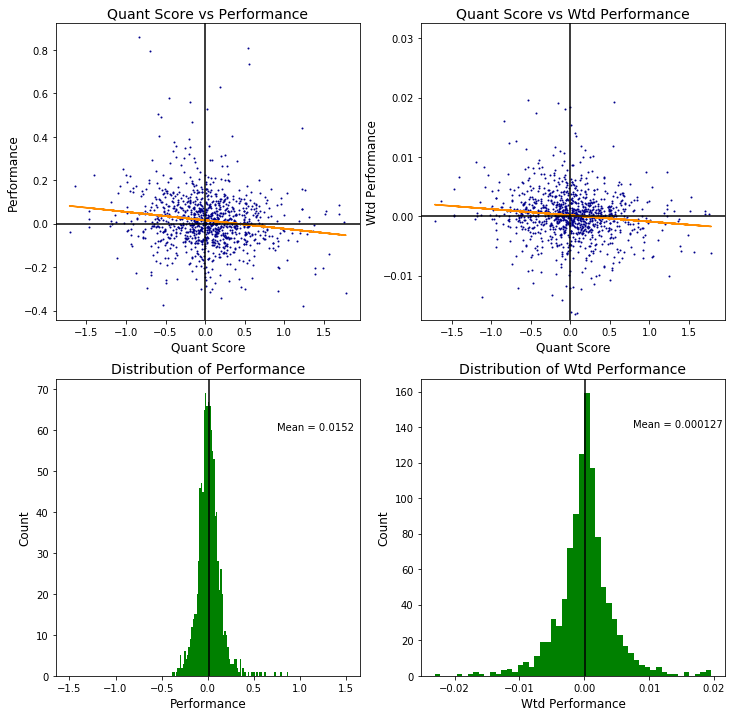

In [89]:
fig = plt.figure()
ax1 = fig.add_subplot(221)
ax1.scatter(dfqs_perf_no_nan['Quant Score'], dfqs_perf_no_nan['Performance'], s=1, color='DarkBlue')
ax1.plot(dfqs_perf_no_nan['Quant Score'], dfqs_perf_no_nan['Trendline1'], color='DarkOrange')
ax1.axhline(y=0, color='Black')
ax1.axvline(x=0, color='Black')
ax1.set_title('Quant Score vs Performance', size=14)
ax1.set_xlabel('Quant Score', size=12)
ax1.set_ylabel('Performance', size=12)
ax2 = fig.add_subplot(223)
ax2.hist(dfqs_perf_no_nan['Performance'], bins=200, color='Green', range=[-1.5,1.5])
ax2.axvline(x=dfqs_perf_no_nan['Performance'].mean(), color='Black')
ax2.set_title('Distribution of Performance', size=14)
ax2.set_xlabel('Performance', size=12)
ax2.set_ylabel('Count', size=12)
ax2.text(0.75,60,'Mean = ' + str(round(dfqs_perf_no_nan['Performance'].mean(),4)))

ax3 = fig.add_subplot(222)
ax3.scatter(dfqs_perf_no_nan['Quant Score'], dfqs_perf_no_nan['Wtd Performance'], s=1, color='DarkBlue')
ax3.set_ylim(-0.0175,0.0325)
ax3.plot(dfqs_perf_no_nan['Quant Score'], dfqs_perf_no_nan['Trendline2'], color='DarkOrange')
ax3.axhline(y=0, color='Black')
ax3.axvline(x=0, color='Black')
ax3.set_title('Quant Score vs Wtd Performance', size=14)
ax3.set_xlabel('Quant Score', size=12)
ax3.set_ylabel('Wtd Performance', size=12)
ax4 = fig.add_subplot(224)
ax4.hist(dfqs_perf_no_nan['Wtd Performance'], bins=50, color='Green')
ax4.axvline(x=dfqs_perf_no_nan['Wtd Performance'].mean(), color='Black')
ax4.set_title('Distribution of Wtd Performance', size=14)
ax4.set_xlabel('Wtd Performance', size=12)
ax4.set_ylabel('Count', size=12)
ax4.text(0.0075,140,'Mean = ' + str(round(dfqs_perf_no_nan['Wtd Performance'].mean(),6)))

plt.show()